In [27]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [28]:
# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

# This link shows you how to greyscale a cmap
# https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

In [29]:
def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)

In [30]:
# First let's find all of our data
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
rootPath = ipyPath + '/figures_for_all_data'
dataPath = rootPath + '/data_folders'

activityRatioPath = dataPath + '/actRat_txt_01_22_19'
particleFractionPath = dataPath + '/parFrac_txt_01_22_19'
monodispersePath = dataPath + '/monotxt_01_22_19'
constantRatioPath = dataPath + '/constRatTxt_02_07_19'

# Go to the correct parent directory
os.chdir(dataPath)

# Create a list for the filenames
fileContainer = []
pathContainer = []

# Get files from each source directory
actRatFiles = os.listdir(activityRatioPath)
nActRatFiles = len(actRatFiles)
parFracFiles = os.listdir(particleFractionPath)
nParFracFiles = len(parFracFiles)
monoFiles = os.listdir(monodispersePath)
nMonoFiles = len(monoFiles)
constFiles = os.listdir(constantRatioPath)
nConstFiles = len(constFiles)

# Populate the file container
fileContainer.append(actRatFiles)
fileContainer.append(parFracFiles)
fileContainer.append(monoFiles)
fileContainer.append(constFiles)
nSweeps = len(fileContainer)
# Populate the path container
pathContainer.append(activityRatioPath)
pathContainer.append(particleFractionPath)
pathContainer.append(monodispersePath)
pathContainer.append(constantRatioPath)

In [31]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [32]:
# Let's sort our respective lists
for i in xrange(nSweeps):
    paList = []
    pbList = []
    prList = []
    xaList = []
    for j in xrange(len(fileContainer[i])):
        paList.append(getFromTxt(fileContainer[i][j], "pa", "_pb"))
        pbList.append(getFromTxt(fileContainer[i][j], "pb", "_xa"))
        xaList.append(getFromTxt(fileContainer[i][j], "xa", "_ep"))
        # We want to use ratios rounded to nearest 0.05
        try:
            tmpPeR = round(paList[j]/pbList[j] * 2, 1) / 2
        except:
            tmpPeR = 1.0
        prList.append(tmpPeR)
    # Now sort the array of txtFile names
    indArr = multiSort(prList, paList, xaList)
    indSort(fileContainer[i], indArr)
    
# Use this to check the parameter sort
# for i in xrange(len(fileContainer[1])):
#     print(fileContainer[1][i])

In [36]:
# Read the data for each parameter study into a pandas dataframe
all_sims = []
for i in xrange(nSweeps):
    all_sims.append([])
    os.chdir(pathContainer[i])
    for j in xrange(len(fileContainer[i])):
        df = pd.read_csv(fileContainer[i][j], sep='\s+', header=0)
        all_sims[i].append(df)
        
# Go back to the source folder (save figures here)
os.chdir(dataPath)        

# If you want to see what your data looks like
# display(all_sims[0][0])

# Get the name of each of the headers in the dataframes
list(all_sims[0][0])

['Timestep',
 'Gas_A',
 'Gas_B',
 'Gas_tot',
 'Dense_A',
 'Dense_B',
 'Dense_tot',
 'Lc_numA',
 'Lc_numB',
 'Lg_clust',
 'MCS',
 'sigALL',
 'sigAA',
 'sigAB',
 'sigBB',
 'phiEff',
 'lg_clustA',
 'tot_clustA',
 'LC_density',
 'DP_density',
 'GP_density']

In [40]:
# Make sure all data is chronilogical
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# Check to see if timesteps are in order
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        myBool = chkSort(all_sims[i][j]['Timestep'])
        if myBool is False:
            print("{} is not chronilogically sorted!").format(fileContainer[i][j])
            exit(1)
        else:
            print("{} sorted... ").format(fileContainer[i][j])

diam_pa0_pb500_xa50_ep82.txt sorted... 
diam_pa50_pb500_xa50_ep82.txt sorted... 
diam_pa100_pb500_xa50_ep82.txt sorted... 
diam_pa150_pb500_xa50_ep82.txt sorted... 
diam_pa200_pb500_xa50_ep82.txt sorted... 
diam_pa250_pb500_xa50_ep82.txt sorted... 
diam_pa300_pb500_xa50_ep82.txt sorted... 
diam_pa350_pb500_xa50_ep82.txt sorted... 
diam_pa400_pb500_xa50_ep82.txt sorted... 
diam_pa450_pb500_xa50_ep82.txt sorted... 
diam_pa500_pb500_xa50_ep82.txt sorted... 
diam_pa0_pb500_xa10_ep82.txt sorted... 
diam_pa0_pb500_xa20_ep82.txt sorted... 
diam_pa0_pb500_xa30_ep82.txt sorted... 
diam_pa0_pb500_xa40_ep82.txt sorted... 
diam_pa0_pb500_xa50_ep82.txt sorted... 
diam_pa0_pb500_xa60_ep82.txt sorted... 
diam_pa0_pb500_xa70_ep82.txt sorted... 
diam_pa0_pb500_xa80_ep82.txt sorted... 
diam_pa0_pb500_xa90_ep82.txt sorted... 
diam_pa125_pb500_xa10_ep82.txt sorted... 
diam_pa125_pb500_xa20_ep82.txt sorted... 
diam_pa125_pb500_xa30_ep82.txt sorted... 
diam_pa125_pb500_xa40_ep82.txt sorted... 
diam_pa125_pb

diam_pa70_pb77_xa50_ep14.txt sorted... 
diam_pa80_pb88_xa50_ep16.txt sorted... 
diam_pa90_pb100_xa50_ep18.txt sorted... 
diam_pa100_pb111_xa50_ep19.txt sorted... 
diam_pa110_pb122_xa50_ep21.txt sorted... 
diam_pa120_pb133_xa50_ep23.txt sorted... 
diam_pa130_pb144_xa50_ep25.txt sorted... 
diam_pa140_pb155_xa50_ep26.txt sorted... 
diam_pa150_pb166_xa50_ep28.txt sorted... 


In [43]:
# Add a column to the all_sims dataframe for number of clusters (of threshold size):
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        # New column for number of clusters
        all_sims[i][j]['nClust'] = all_sims[i][j]['Dense_tot'] / all_sims[i][j]['MCS']
        # Ger rid of NaN in favor of 0
        all_sims[i][j].fillna(0, inplace=True)

# display(all_sims[0][0])
list(all_sims[0][0])

['Timestep',
 'Gas_A',
 'Gas_B',
 'Gas_tot',
 'Dense_A',
 'Dense_B',
 'Dense_tot',
 'Lc_numA',
 'Lc_numB',
 'Lg_clust',
 'MCS',
 'sigALL',
 'sigAA',
 'sigAB',
 'sigBB',
 'phiEff',
 'lg_clustA',
 'tot_clustA',
 'LC_density',
 'DP_density',
 'GP_density',
 'nClust']

In [45]:
# Function that will sort wrt one variable
def singleSort(arr):
    for i in xrange(len(arr)):
        for j in xrange(len(arr)):
            if arr[i] < arr[j] and i > j:
                arr[i], arr[j] = arr[j], arr[i]
                
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon):
    # This is actually indpendent of runtime :)
#     sigma = 1.0
#     threeEtaPiSigma = 1.0
#     runFor = 200
#     tauBrown = 1.0
#     tauLJ = ((sigma**2) * threeEtaPiSigma) / epsilon
#     dt = 0.00001 * tauLJ
#     simLength = runFor * tauBrown
#     totTsteps = int(simLength / dt)
#     tstepPerTau = int(totTsteps / float(simLength))
    kBT = 1.0
    tstepPerTau = int(epsilon / (kBT * 0.00001))
    return tstepPerTau

def theoryDenom(xS, peS, peF):
    xS /= 100.0
    xF = 1.0 - xS
    return 4.0 * ((xS * peS) + (xF * peF))

def theory(xS, peS, peF):
    kappa = 4.05
    xS /= 100.0
    xF = 1.0 - xS
    return ((3.0 * (np.pi**2) * kappa) / (4.0 * ((xS * peS) + (xF * peF))))

# Make an additional frame that gives total number of particles, and simulation parameters
params = []
for i in xrange(nSweeps):
    paramList = []
    for j in xrange(len(fileContainer[i])):
        partAll = all_sims[i][j]['Gas_tot'][0]
        partA = all_sims[i][j]['Gas_A'][0]
        partB = all_sims[i][j]['Gas_B'][0]
        pa = getFromTxt(fileContainer[i][j], "pa", "_pb")
        pb = getFromTxt(fileContainer[i][j], "pb", "_xa")
        xa = getFromTxt(fileContainer[i][j], "xa", "_ep")
        ep = getFromTxt(fileContainer[i][j], "ep", ".txt")
        converT = computeTauPerTstep(ep)
        mytheoryDenom = theoryDenom(xa, pa, pb)
        if pa != 0 or pb != 0: 
            mytheory = theory(xa, pa, pb)
        else:
            mytheory = 0.0

        # This is monodisperse
        if pb == 0 and xa == 100:
            prat = 1.0

        # This is active/passive
        elif pb == 0 and xa != 100:
            prat = 0.0

        # Everything else
        else:
            # Round to the nearest tenths place
            prat = round(float(pa)/float(pb) * 2, 1) / 2

        paramList.append((partAll, partA, partB, pa, pb, xa, prat, ep, converT, mytheoryDenom, mytheory))

    # Put the data for this parameter sweep into it's own dataframe
    params.append(pd.DataFrame(paramList, columns=['partAll',
                                                  'partA',
                                                  'partB',
                                                  'peA',
                                                  'peB',
                                                  'xA',
                                                  'peR',
                                                  'eps',
                                                  'brownTime',
                                                  'theoryDenom',
                                                  'theory'])
                 )
    pd.set_option('display.max_rows', 2)
    display(params[i])

,partAll,partA,partB,peA,peB,xA,peR,eps,brownTime,theoryDenom,theory
0,100000,50000,50000,0.0,500.0,50.0,0.0,82.0,8199999,1000.0,0.119916
...,...,...,...,...,...,...,...,...,...,...,...
10,100000,50000,50000,500.0,500.0,50.0,1.0,82.0,8199999,2000.0,0.059958


,partAll,partA,partB,peA,peB,xA,peR,eps,brownTime,theoryDenom,theory
0,100000,10000,90000,0.0,500.0,10.0,0.00,82.0,8199999,1800.0,0.066620
...,...,...,...,...,...,...,...,...,...,...,...
37,100000,100000,0,375.0,500.0,100.0,0.75,82.0,8199999,1500.0,0.079944


,partAll,partA,partB,peA,peB,xA,peR,eps,brownTime,theoryDenom,theory
0,100000,100000,0,0.0,0.0,100.0,1.0,1.0,99999,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
10,100000,100000,0,500.0,0.0,100.0,1.0,82.0,8199999,2000.0,0.059958


,partAll,partA,partB,peA,peB,xA,peR,eps,brownTime,theoryDenom,theory
0,50000,25000,25000,10.0,100.0,50.0,0.1,18.0,1799999,220.0,0.545071
...,...,...,...,...,...,...,...,...,...,...,...
163,50000,25000,25000,150.0,166.0,50.0,0.9,28.0,2800000,632.0,0.189740


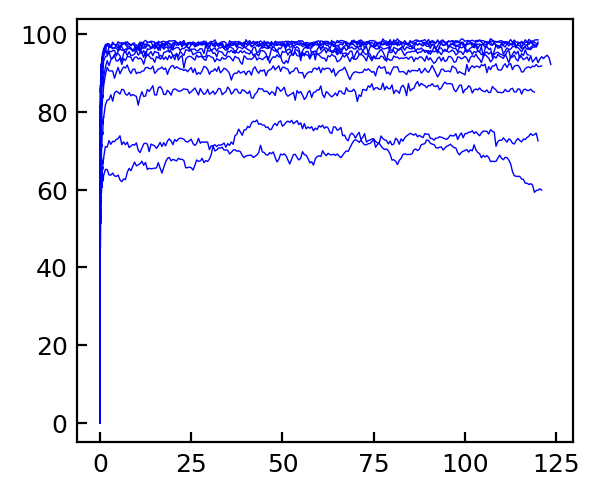

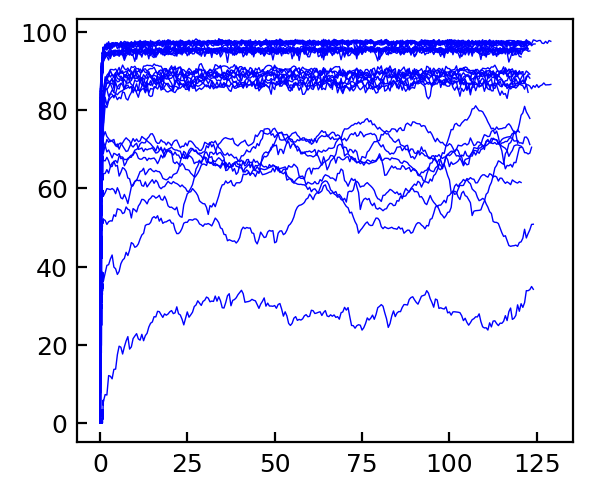

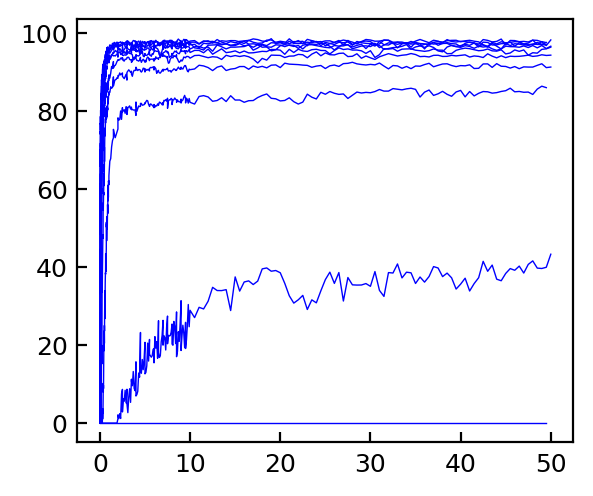

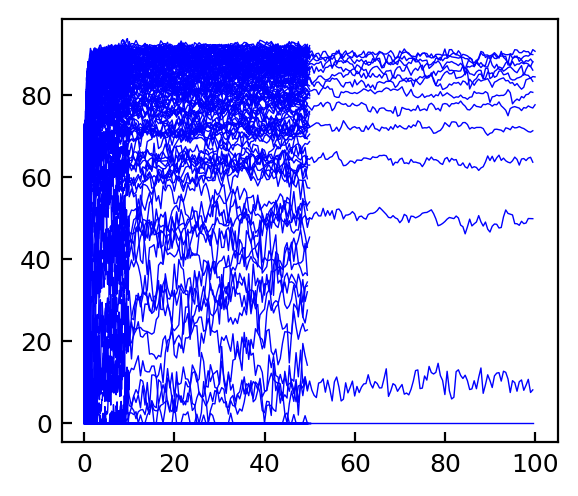

In [46]:
# Make sure I haven't messed up my data
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j],
                 all_sims[i][j]['Dense_A'][:] / params[i]['partA'][j] * 100.0,
                 c='b',
                 label=str(params[i]['peR'][j]))
    plt.show()

In [ ]:
# We should average past a specific time, not an index number...
ssStartTime = 25.0
ssStartInd = []
badFiles = []

# Figure out what we should use for steady-state
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if all_sims[i][j]['Timestep'].iloc[-1] / params[i]['brownTime'][j] >= ssStartTime:
            for k in xrange(len(all_sims[i][j]['Timestep'])):
                if all_sims[i][j]['Timestep'][k] / params[i][j]['brownTime'][k] >= ssStartTime:
                    ssStartInd.append(k)
                    break
        else:
            badFiles.append(j)

# Get indices for files which aren't at steady-state
for i in xrange(numFiles):
    if all_sims[i]['Timestep'].iloc[-1] / params['brownTime'][i] >= ssStartTime:
        for j in xrange(len(all_sims[i]['Timestep'])):
            if all_sims[i]['Timestep'][j] / params['brownTime'][i] >= ssStartTime:
                ssStartInd.append(j)
                break
    else:
        badFiles.append(i)

# Delete rows of dataframe
# Remove these indices from: txtFiles, all_sims, params
print("Number of textfiles before delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes before delete: {}").format(len(all_sims))
print("Params rows before delete: {}").format(len(params['partAll']))
if badFiles:
    # You have to reverse the order so that you don't mess up your indexing
    for myindex in sorted(badFiles, reverse=True):
        del txtFiles[myindex]
        del all_sims[myindex]
        params.drop(params.index[myindex], inplace=True)  
print("Number of textfiles after delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes after delete: {}").format(len(all_sims))
print("Params rows after delete: {}").format(len(params['partAll']))

# You have to reindex the dataframe
params.index = range(len(params['partAll']))
numFiles = len(txtFiles)

# Visual check to see if this is the appropriate time window for steady-state
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
    plt.plot(all_sims[i]['Timestep'][ssStartInd[i]:-1] / params['brownTime'][i],
             all_sims[i]['Dense_A'][ssStartInd[i]:-1] / params['partA'][i] * 100.0,
             c='k')
plt.show()

Number of textfiles before delete: 221
Number of all_sims dataframes before delete: 221
Params rows before delete: 221
Number of textfiles after delete: 216
Number of all_sims dataframes after delete: 216
Params rows after delete: 216


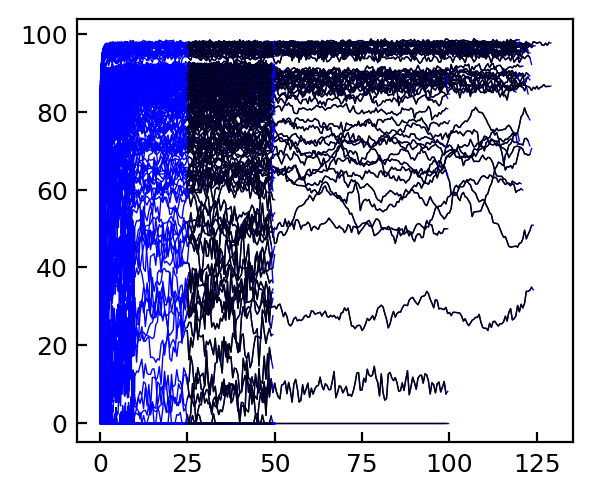

In [12]:
# Figure out what we should use for steady-state
numFiles = len(txtFiles)
# We should average past a specific time, not an index number...
ssStartTime = 25.0
ssStartInd = []
badFiles = []
# Get indices for files which aren't at steady-state
for i in xrange(numFiles):
    if all_sims[i]['Timestep'].iloc[-1] / params['brownTime'][i] >= ssStartTime:
        for j in xrange(len(all_sims[i]['Timestep'])):
            if all_sims[i]['Timestep'][j] / params['brownTime'][i] >= ssStartTime:
                ssStartInd.append(j)
                break
    else:
        badFiles.append(i)

# Delete rows of dataframe
# Remove these indices from: txtFiles, all_sims, params
print("Number of textfiles before delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes before delete: {}").format(len(all_sims))
print("Params rows before delete: {}").format(len(params['partAll']))
if badFiles:
    # You have to reverse the order so that you don't mess up your indexing
    for myindex in sorted(badFiles, reverse=True):
        del txtFiles[myindex]
        del all_sims[myindex]
        params.drop(params.index[myindex], inplace=True)  
print("Number of textfiles after delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes after delete: {}").format(len(all_sims))
print("Params rows after delete: {}").format(len(params['partAll']))

# You have to reindex the dataframe
params.index = range(len(params['partAll']))
numFiles = len(txtFiles)

# Visual check to see if this is the appropriate time window for steady-state
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
    plt.plot(all_sims[i]['Timestep'][ssStartInd[i]:-1] / params['brownTime'][i],
             all_sims[i]['Dense_A'][ssStartInd[i]:-1] / params['partA'][i] * 100.0,
             c='k')
plt.show()

In [13]:
# Get lists for distinct values that I might want to plot
distPeR = []
for i in xrange(numFiles):
    if params['peR'][i] not in distPeR:
        distPeR.append(params['peR'][i])
singleSort(distPeR)
print(distPeR)

distxA = []
for i in xrange(numFiles):
    if params['xA'][i] not in distxA:
        distxA.append(params['xA'][i])
singleSort(distxA)
print(distxA)

[0.0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0]
[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]


In [14]:
# Now get time-based steady state values

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
var = pd.DataFrame(columns=headers)
# Initialize dataframes
for i in xrange(numFiles):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)
    var.loc[i] = [0] * len(headers)
    
# Make dataframe of steady-state data
for i in xrange(numFiles):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(all_sims[i].iloc[1])):
        # Compute mean of data after steady-state time (25tb) in jth column of ith file
        avg = np.mean(all_sims[i].iloc[ssStartInd[i]:-1, j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation and variance in this data
        stdError = np.std(all_sims[i].iloc[ssStartInd[i]:-1, j])
        stdErr[headers[j-1]][i] = stdError
        var[headers[j-1]][i] = stdError ** 2
        
# Normalize by number of particles
for i in xrange(len(txtFiles)):
    if params['partA'][i] != 0:
        SS['Gas_A'][i] /= params['partA'][i]
        SS['Dense_A'][i] /= params['partA'][i]
        SS['Lc_numA'][i] /= params['partA'][i]
        # Now my standard error is a percentage
        stdErr['Gas_A'][i] /= params['partA'][i]
        stdErr['Dense_A'][i] /= params['partA'][i]
        stdErr['Lc_numA'][i] /= params['partA'][i]
        var['Gas_A'][i] /= params['partA'][i]
        var['Dense_A'][i] /= params['partA'][i]
        var['Lc_numA'][i] /= params['partA'][i]
        
    if params['partB'][i] != 0:
        SS['Gas_B'][i] /= params['partB'][i]
        SS['Dense_B'][i] /= params['partB'][i]
        SS['Lc_numB'][i] /= params['partB'][i]
        stdErr['Gas_B'][i] /= params['partB'][i]
        stdErr['Dense_B'][i] /= params['partB'][i]
        stdErr['Lc_numB'][i] /= params['partB'][i]
        var['Gas_B'][i] /= params['partB'][i]
        var['Dense_B'][i] /= params['partB'][i]
        var['Lc_numB'][i] /= params['partB'][i]

SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]
stdErr['Gas_tot'][:] /= params['partAll'][:]
stdErr['Dense_tot'][:] /= params['partAll'][:] 
stdErr['Lg_clust'][:] /= params['partAll'][:] 
stdErr['MCS'][:] /= params['partAll'][:]
var['Gas_tot'][:] /= params['partAll'][:]
var['Dense_tot'][:] /= params['partAll'][:] 
var['Lg_clust'][:] /= params['partAll'][:] 
var['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lc_numA'][:] *= 100.0
SS['Lc_numB'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
stdErr['Gas_A'][:] *= 100.0
stdErr['Gas_B'][:] *= 100.0
stdErr['Gas_tot'][:] *= 100.0
stdErr['Dense_A'][:] *= 100.0
stdErr['Dense_B'][:] *= 100.0
stdErr['Dense_tot'][:] *= 100.0
stdErr['Lc_numA'][:] *= 100.0
stdErr['Lc_numB'][:] *= 100.0
stdErr['Lg_clust'][:] *= 100.0
stdErr['MCS'][:] *= 100.0
var['Gas_A'][:] *= 100.0
var['Gas_B'][:] *= 100.0
var['Gas_tot'][:] *= 100.0
var['Dense_A'][:] *= 100.0
var['Dense_B'][:] *= 100.0
var['Dense_tot'][:] *= 100.0
var['Lc_numA'][:] *= 100.0
var['Lc_numB'][:] *= 100.0
var['Lg_clust'][:] *= 100.0
var['MCS'][:] *= 100.0
pd.set_option('display.max_rows', 2)
display(SS)
display(stdErr)
display(var)

,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,...,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density,nClust
0,35.8124,2.53135,5.85945,64.1876,97.4687,94.1405,64.0828,97.3888,94.0582,91.4229,...,1.00011,1.00009,1.0001,0.6,73887.7,73952.3,1.27,1.27,0.103684,1.0579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2.29463,0,2.29463,97.7054,0,97.7054,97.5887,0,97.5887,94.7121,...,1.00005,0,0,0.6,76654.2,76745.8,1.27,1.27,0.0422449,1.06123


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,...,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density,nClust
0,4.5971,0.431743,0.605488,4.5971,0.431743,0.605488,4.68,0.578477,0.731024,11.0427,...,0.000283676,0.00015734,0.000102549,1.88738e-15,576.844,477.969,3.9968e-15,3.9968e-15,0.0103672,0.233547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.368317,0,0.368317,0.368317,0,0.368317,0.595585,0,0.595585,11.7078,...,9.49802e-05,0,0,5.55112e-16,471.604,296.588,1.33227e-15,1.33227e-15,0.00678092,0.239745


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,...,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density,nClust
0,2113.34,167.762,366.616,2113.34,167.762,366.616,2190.24,301.172,534.397,121940,...,8.0472e-08,2.4756e-08,1.05163e-08,3.5622e-30,332749,228454,1.59744e-29,1.59744e-29,0.000107479,0.0545442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,135.657,0,135.657,135.657,0,135.657,354.722,0,354.722,137073,...,9.02124e-09,0,0,3.08149e-31,222410,87964.3,1.77494e-30,1.77494e-30,4.59808e-05,0.0574776


In [15]:
# Okay, now we have all of our data wrangled, we can plot it
from collections import OrderedDict

myCols = ['#26284A',
          '#01545B',
          '#017351',
          '#02C383',
          '#AAD962',
          '#FABF45',
          '#EF6A32',
          '#ED0245',
          '#A1295E',
          '#700161',
          'k']

myShps = ['o',
          '^',
          's',
          'D',
          'P',
          'X',
          '*',
          '<']

def getCol(peR):
    index = int(peR * 10) - 1
    return myCols[index]

def getShp(xA):
    index = int(xA / 10)
    return myShps[index]